# Exploratory Data Analysis

Because the data was obtained through the Spotify API, the dataset is relatively clean and easily understood. However, due to the selection strategy of the data, some additional exploration and transformation will be required for the eventual goal of attempting to predict genres.

### Load Data

#### Import Libraries

In [36]:
import ast
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

sns.set_style('whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Define Data location
load_dotenv()

DATA_PATH = Path(os.getenv('PROJECT_ROOT'), '.') / 'data'
TRACKS_FILE = DATA_PATH / 'spotify_track_features.csv'
ARTISTS_FILE = DATA_PATH / 'spotify_artist_features.csv'

In [3]:
# Import data
tracks = pd.read_csv(TRACKS_FILE)
artists = pd.read_csv(ARTISTS_FILE)

#### Inspect data

In [4]:
tracks.head()

,track_id,duration_ms,track_name,track_popularity,artist_ids,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0yM3VmM8gHEVGViKvAbQkc,353920,"Defying Gravity - From ""Wicked"" Original Broad...",56,"['7daPb40K64rRtF36wd3ZOk', '3DgcBA7P0ji5co7Z1G...",0.722,0.333,0.377,0.000000,6,0.0333,-8.282,1,0.0343,87.613,4,0.245
1,5yR9jaIJerOKso2maFPU0w,216133,One Day More,0,['7EzZtsaDuv0EecScnO7wrh'],0.870,0.221,0.477,0.000091,9,0.1730,-7.463,1,0.0316,78.604,4,0.256
2,7FmI3ygVG04KIhikMHKOKB,315013,A Little Priest,46,"['3OsHwkxpSIEqqmYoQxZTT5', '7gX22Ua3mEH2KXTCpI...",0.874,0.537,0.203,0.000000,6,0.0576,-14.700,1,0.0778,105.925,3,0.380
3,3qmB68tGvftnxiomUaNKMW,305373,And I Am Telling You I'm Not Going,0,"['35GL8Cu2GKTcHzKGi75xl5', '0LyfQWJT6nXafLPZqx...",0.206,0.467,0.734,0.000000,10,0.1600,-5.149,1,0.0811,121.351,4,0.345
4,5gw8HNcrqliEw0X6pPrPvG,182746,Seasons of Love,60,"['5gGhRZgP9BJL9fsFdvTzeX', '6jRmwlzMVSICyO97aN...",0.609,0.475,0.579,0.000000,5,0.0756,-4.096,1,0.0334,178.151,4,0.466


In [5]:
tracks.info()
tracks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12814 non-null  object 
 1   duration_ms       12814 non-null  int64  
 2   track_name        12813 non-null  object 
 3   track_popularity  12814 non-null  int64  
 4   artist_ids        12814 non-null  object 
 5   acousticness      12814 non-null  float64
 6   danceability      12814 non-null  float64
 7   energy            12814 non-null  float64
 8   instrumentalness  12814 non-null  float64
 9   key               12814 non-null  int64  
 10  liveness          12814 non-null  float64
 11  loudness          12814 non-null  float64
 12  mode              12814 non-null  int64  
 13  speechiness       12814 non-null  float64
 14  tempo             12814 non-null  float64
 15  time_signature    12814 non-null  int64  
 16  valence           12814 non-null  float6

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.281400e+04,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.00000,12814.000000,12814.000000,12814.00000
mean,2.272213e+05,53.916107,0.365699,0.580146,0.557648,0.213350,5.254487,0.172038,-9.913158,0.613079,0.08613,117.981698,3.882706,0.47313
std,1.048972e+05,24.785751,0.357786,0.191357,0.278776,0.355218,3.552739,0.136254,6.903724,0.487064,0.08760,30.274749,0.441073,0.26351
min,0.000000e+00,0.000000,0.000002,0.000000,0.001100,0.000000,0.000000,0.015700,-47.903000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,1.721242e+05,41.000000,0.037825,0.455000,0.355000,0.000000,2.000000,0.093700,-12.157500,0.000000,0.03680,94.773250,4.000000,0.24800
50%,2.124545e+05,58.000000,0.216000,0.596000,0.598000,0.000197,5.000000,0.118000,-7.661500,1.000000,0.04910,118.015000,4.000000,0.46900
75%,2.580252e+05,73.000000,0.712000,0.727000,0.786000,0.317000,8.000000,0.203000,-5.293000,1.000000,0.08900,137.015250,4.000000,0.68900
max,2.668693e+06,100.000000,0.996000,0.979000,0.999000,0.994000,11.000000,1.000000,2.015000,1.000000,0.93700,218.803000,5.000000,0.98800


In [6]:
artists.head()

,artist_genres,artist_id,artist_name,artist_popularity,artist_followers
0,['orchestral performance'],1C3E8y3WbXJJYWs9Ex11et,José Serebrier,39,1757
1,['gogeo'],6Oq5iunq4z5E4yAdNpWAjk,Susan Díaz,43,4323
2,"['edm', 'electro house', 'pop dance', 'progres...",6TQj5BFPooTa08A7pk8AQ1,Kaskade,65,922955
3,[],68NgHHqc86eozApgpR8ZTz,Big O,31,976
4,['nueva ola chilena'],4yBGwLykrZ7TsKLIepDxYJ,Carlos Gonzalez,33,1449


In [7]:
artists.info()
artists.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_genres      7436 non-null   object
 1   artist_id          7436 non-null   object
 2   artist_name        7436 non-null   object
 3   artist_popularity  7436 non-null   int64 
 4   artist_followers   7436 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 290.6+ KB


,artist_popularity,artist_followers
count,7436.000000,7.436000e+03
mean,47.555675,1.235776e+06
std,18.324380,5.065056e+06
min,0.000000,0.000000e+00
25%,36.000000,2.859750e+03
50%,49.000000,4.293800e+04
75%,61.000000,5.227248e+05
max,100.000000,1.128150e+08


#### Label Exploration

Most of the features that are likely to be useful for predicting genre are already nicely scaled and non-null. The main transformation task will be the development and representation of the genre label. I will work with the subset of artists that have one or more genre labels and the tracks that have at least one such artist associated with them.

In [8]:
# Convert list-like columns explicitly into lists
tracks['artist_ids'] = tracks['artist_ids'].apply(ast.literal_eval)
artists['artist_genres'] = artists['artist_genres'].apply(ast.literal_eval)

In [9]:
# Obtain the number of genres labels per artist
artists['n_genres'] = artists['artist_genres'].apply(len)
artists['n_genres'].describe()

count    7436.000000
mean        2.055944
std         2.063052
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: n_genres, dtype: float64

In [19]:
# Since some artists have no genres, obtain subset of artists with non-empty genre list
artists_with_genre = artists[artists['n_genres'] > 0].copy()
artists_with_genre.describe()

,artist_genres,artist_id,artist_name,artist_popularity,artist_followers,n_genres
0,[orchestral performance],1C3E8y3WbXJJYWs9Ex11et,José Serebrier,39,1757,1
1,[gogeo],6Oq5iunq4z5E4yAdNpWAjk,Susan Díaz,43,4323,1
2,"[edm, electro house, pop dance, progressive el...",6TQj5BFPooTa08A7pk8AQ1,Kaskade,65,922955,6
4,[nueva ola chilena],4yBGwLykrZ7TsKLIepDxYJ,Carlos Gonzalez,33,1449,1
6,"[dancehall, jamaican dancehall, jamaican hip h...",30hElzuHCZ1qzCl364SHma,Teejay,54,203536,5


Note that this filter discards 1875 artists (just over 25% of the initial dataset) and shifts the distributions of popularity and follower count upwards.

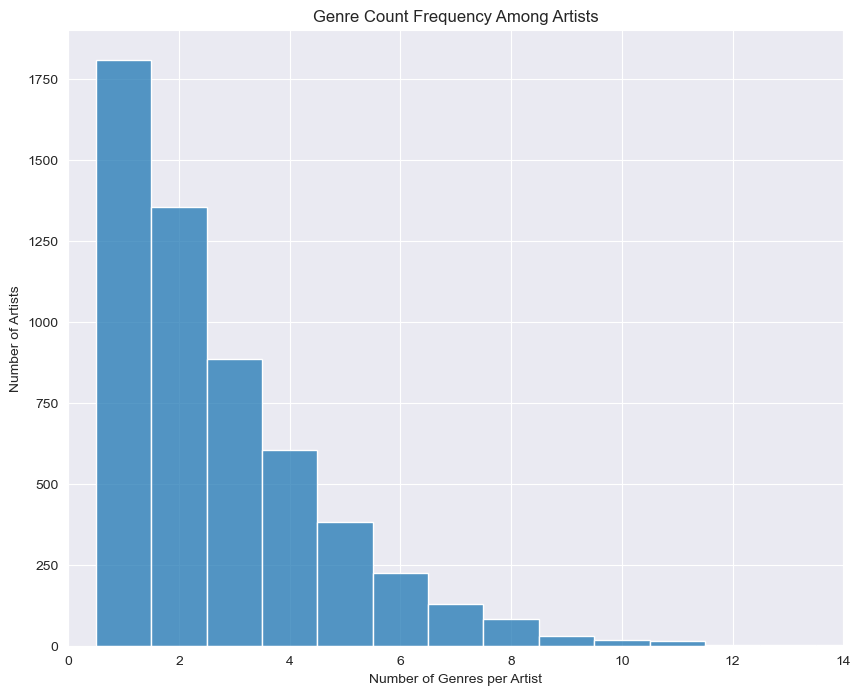

In [11]:
# Plot genres per artist distribution
plt.figure(figsize=(10, 8))
plt.title('Genre Count Frequency Among Artists')
plt.xlim([0,14])
plt.xlabel('Number of Genres per Artist')
plt.ylabel('Number of Artists')
sns.histplot(artists_with_genre['n_genres'], discrete=True)
plt.show()

In [12]:
# Obtain all artist-genre combinations for counting, then count genres, which yields what is essentially the inverse of the above
genre_counts = artists_with_genre.explode('artist_genres')['artist_genres'].value_counts()
genre_counts.head()

artist_genres
rock            198
pop             169
rap             160
classic rock    137
trap            129
Name: count, dtype: int64

In [13]:
n_genres_total = genre_counts.size
print(f'Total genres found: {n_genres_total}')

Total genres found: 1987


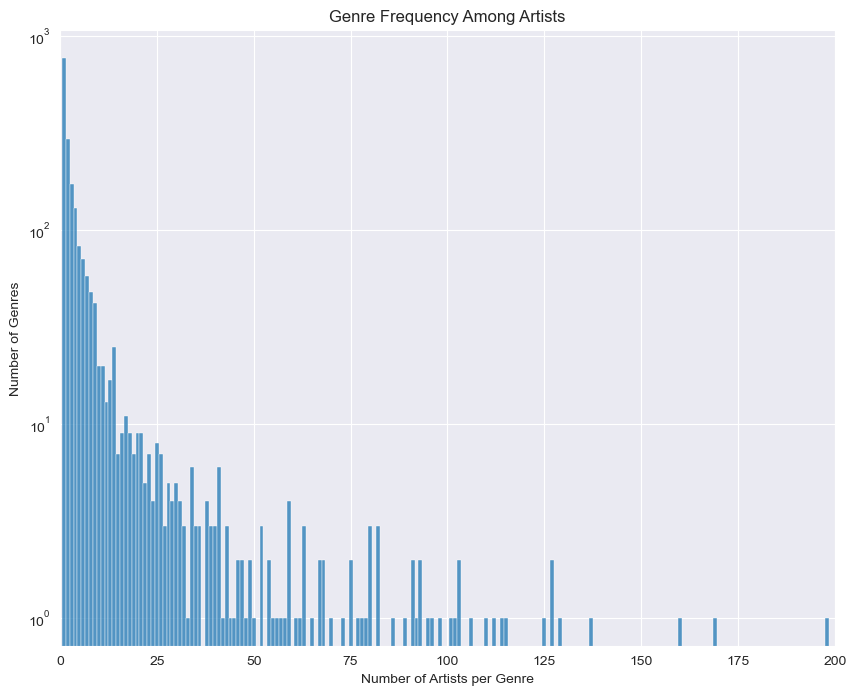

In [14]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Genre Frequency Among Artists')
plt.xlim([0,200])
plt.xlabel('Number of Artists per Genre')
plt.ylabel('Number of Genres')
plt.yscale('log')
sns.histplot(genre_counts, discrete=True)
plt.show()

In [15]:
# Obtain the number of genres labels per artist
tracks['n_artists'] = tracks['artist_ids'].apply(len)
tracks['n_artists'].describe()

count    12814.000000
mean         1.515296
std          0.941532
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: n_artists, dtype: float64

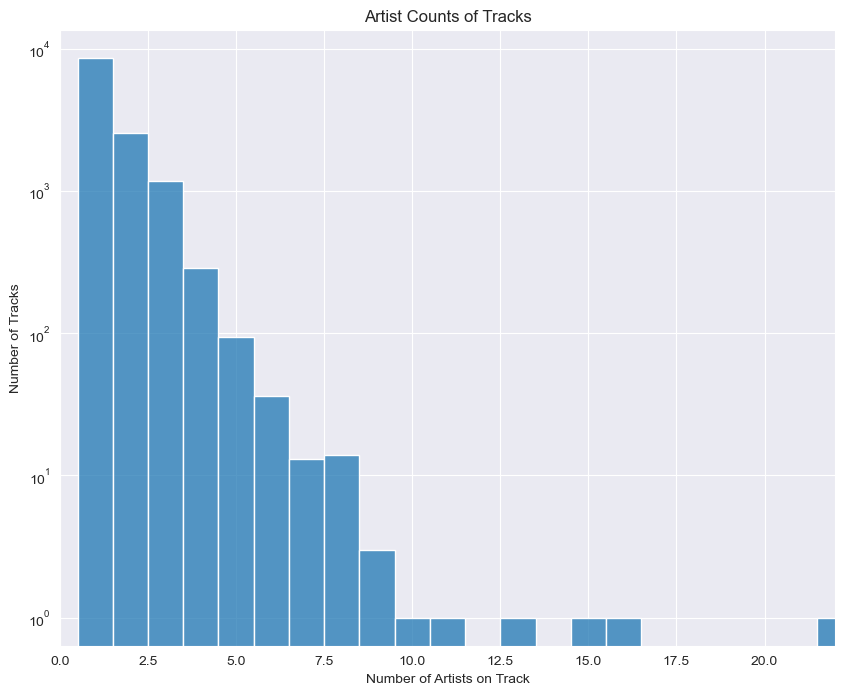

In [33]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Artist Counts of Tracks')
plt.xlim([0,22])
plt.xlabel('Number of Artists on Track')
plt.ylabel('Number of Tracks')
plt.yscale('log')
sns.histplot(tracks['n_artists'], discrete=True)
plt.show()

From the above we learn the following:
- Most genres in the dataset are either extremely specific or obscure, being associated with only one or a few artists
- The artists-per-genre distribution does have a long tail though, so there are a few genres that are associated with a much higher number of artists
- Most artists have a reasonable number of genre tags, with the majority being only associated with one. Even at the extreme tail the number of genre tags is low compared to the number of genres in the dataset.
- Similarly, most tracks are associated with a small number of artists, with the most common number being one.

#### Initial Transformations for Label Representation

This is a multi-label classification problem, because a single track can belong to multiple genres, especially if the genres are highly specific. A potential extension or improvement would be to first cluster the genres, in which case this task could potentially reduce to a multi-class classification (in which a track belongs to only one genre class), except for a few tracks that simultaneously contain elements of multiple disparate genres. 

Another possibility is to develop a genre hierarchy, and treat the problem as a sequential binary classification problem, first predicting class membership in generic genres (such as `edm`) and using that prediction as a feature to predict membership in a more specific genre class (such as `brazilian tech house`). However, this introduces the need for higher model complexity and more advanced modeling techniques, especially when it's possible that the genre relationship graph might not be a simple tree, and may even contain cycles.

For the first attempt at classification, I will attempt to use a multi-hot powerset representation, i.e., each label is marked as `1` if present and `0`  otherwise, and each combination is treated as a distinct label. This is the simplest representation, and it directly maps to the structure of the data. The performance will be benchmarked to the prediction of well-represented labels, for which there is more training data. 

It is likely that the obscure genres and genre combinations will not have enough training data for prediction and possible that the model will not perform well on the broader genre categories, in which case clustering is the more straightforward approach for improvement.


In [24]:
# Obtain track-artist combinations and remove artists without genres, then regroup
track_artist_exp = tracks.explode('artist_ids')
track_artist_exp_filtered = track_artist_exp[track_artist_exp['artist_ids'].isin(artists_with_genre['artist_id'])]
tracks_artists_filtered = track_artist_exp_filtered.groupby('track_id')['artist_ids'].agg(list).reset_index()
tracks_artists_filtered.head()

,track_id,artist_ids
0,000u1dTg7y1XCDXi80hbBX,[5JsdVATHNPE0XdMFMRoSuf]
1,003FTlCpBTM4eSqYSWPv4H,[3vAaWhdBR38Q02ohXqaNHT]
2,003vvx7Niy0yvhvHt4a68B,"[0C0XlULifJtAgn6ZNCW2eu, 0C0XlULifJtAgn6ZNCW2eu]"
3,008RKiNmjW5Lb6Ocumq6MA,[6mOCYCpXBAmulHN4kMfQaa]
4,009ImBOrIUlWgla8U05RAC,[6jJ0s89eD6GaHleKKya26X]


In [30]:
# Rejoin the track features and recalculate artist count
tracks_filtered = pd.merge(tracks, tracks_artists_filtered, how='right', on='track_id', suffixes=('', '_filtered'))
tracks_filtered  =tracks_filtered.drop(['artist_ids', 'n_artists'], axis=1).rename(columns={'artist_ids_filtered': 'artist_ids'})
tracks_filtered['n_artists'] = tracks_filtered['artist_ids'].apply(len)

In [32]:
tracks_filtered.describe()

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,n_artists
count,1.168200e+04,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000
mean,2.281778e+05,54.967728,0.348159,0.582117,0.570959,0.191709,5.255436,0.173468,-9.496333,0.612224,0.087358,118.217594,3.889916,0.479449,1.761770
std,1.018917e+05,24.753086,0.348836,0.193023,0.271012,0.340374,3.556481,0.138059,6.518465,0.487264,0.088478,30.010029,0.429862,0.263574,1.409545
min,2.560000e+04,0.000000,0.000002,0.000000,0.001100,0.000000,0.000000,0.015700,-47.903000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.748492e+05,42.000000,0.034925,0.458000,0.379000,0.000000,2.000000,0.092925,-11.665750,0.000000,0.036900,94.969250,4.000000,0.258000,1.000000
50%,2.142260e+05,60.000000,0.197000,0.600000,0.610000,0.000126,5.000000,0.119000,-7.445000,1.000000,0.049400,118.218500,4.000000,0.480000,1.000000
75%,2.582630e+05,74.000000,0.671000,0.730000,0.791000,0.162000,8.000000,0.206000,-5.206000,1.000000,0.092275,137.516750,4.000000,0.695000,2.000000
max,2.668693e+06,100.000000,0.996000,0.979000,0.999000,0.994000,11.000000,1.000000,2.015000,1.000000,0.937000,217.969000,5.000000,0.988000,18.000000


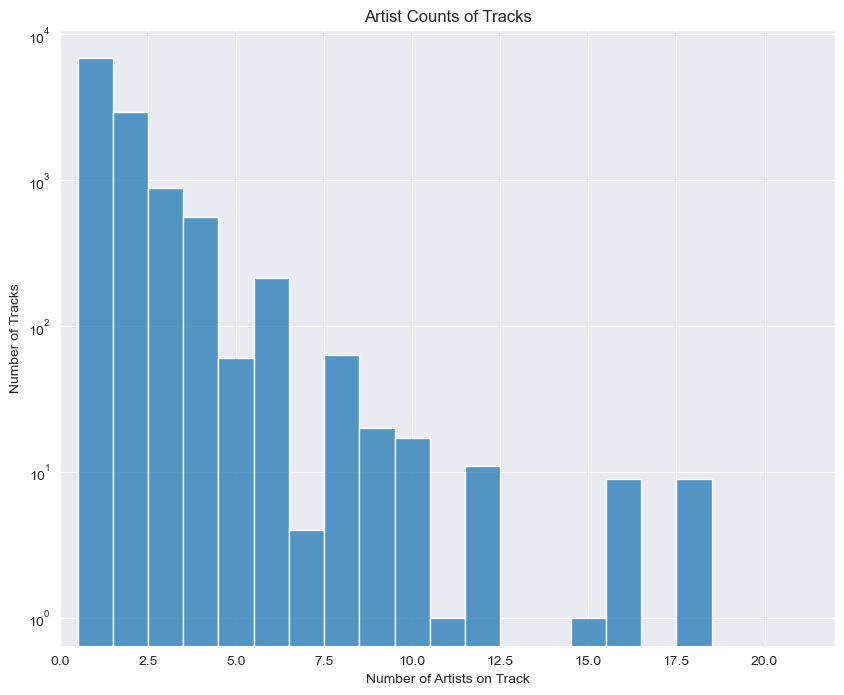

In [35]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Artist Counts of Tracks')
plt.xlim([0,22])
plt.xlabel('Number of Artists on Track')
plt.ylabel('Number of Tracks')
plt.yscale('log')
sns.histplot(tracks_filtered['n_artists'], discrete=True)
plt.show()

After filtering, 1132 tracks are removed from the dataset (about 8.8%), despite the loss 25% of artists. The popularity distribution increases here as well, and the distribution of artist counts has shifted slightly. The distributions of the audio features appear to be similar to before. 

In [ ]:
# Store the columns used for prediction. Starting with only audio characteristics for the initial attempts
TRACK_FEATURE_FIELDS = [
    'duration_ms', 
    'acousticness', 
    'danceability', 
    'energy', 
    'instrumentalness', 
    'key', 
    'liveness', 
    'loudness', 
    'mode', 
    'speechiness', 
    'tempo', 
    'time_signature', 
    'valence'
]

<Axes: xlabel='valence', ylabel='Count'>

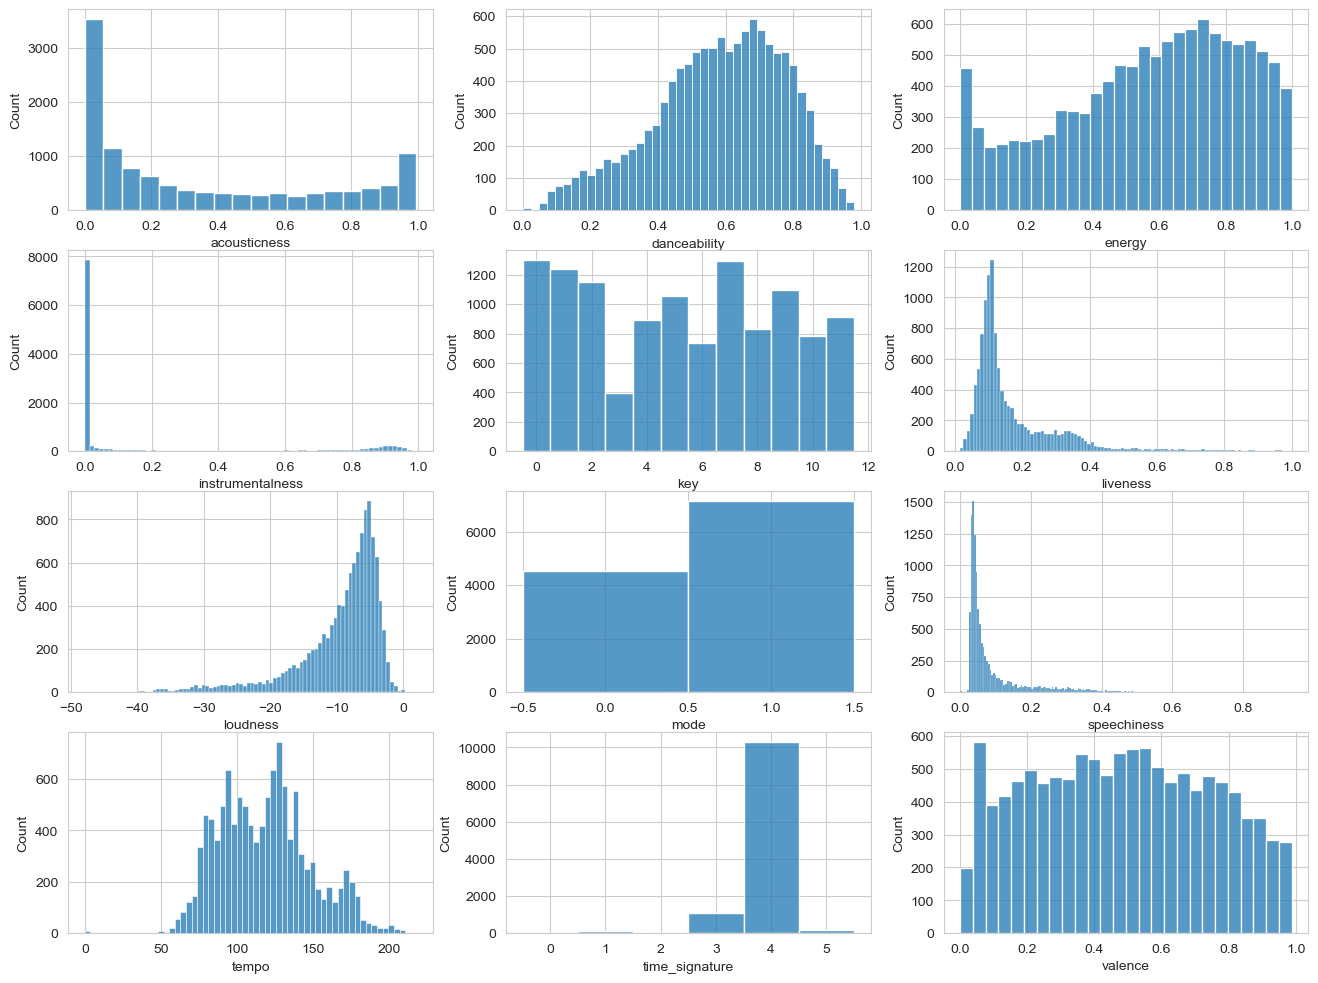

In [41]:
plt.figure(figsize=(16, 12))

plt.subplot(4, 3, 1)
sns.histplot(tracks_filtered['acousticness'])
plt.subplot(4, 3, 2)
sns.histplot(tracks_filtered['danceability'])
plt.subplot(4, 3, 3)
sns.histplot(tracks_filtered['energy'])

plt.subplot(4, 3, 4)
sns.histplot(tracks_filtered['instrumentalness'])
plt.subplot(4, 3, 5)
sns.histplot(tracks_filtered['key'], discrete=True)
plt.subplot(4, 3, 6)
sns.histplot(tracks_filtered['liveness'])

plt.subplot(4, 3, 7)
sns.histplot(tracks_filtered['loudness'])
plt.subplot(4, 3, 8)
sns.histplot(tracks_filtered['mode'], discrete=True)
plt.subplot(4, 3, 9)
sns.histplot(tracks_filtered['speechiness'])

plt.subplot(4, 3, 10)
sns.histplot(tracks_filtered['tempo'])
plt.subplot(4, 3, 11)
sns.histplot(tracks_filtered['time_signature'], discrete=True)
plt.subplot(4, 3, 12)
sns.histplot(tracks_filtered['valence'])

plt.show()

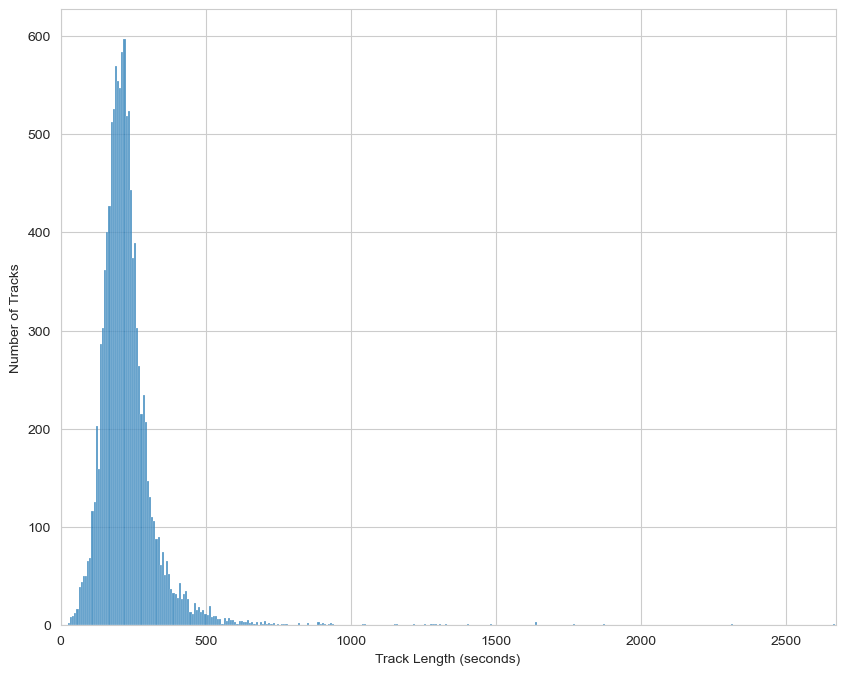

In [47]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('')
plt.xlim([0,2669])
plt.xlabel('Track Length (seconds)')
plt.ylabel('Number of Tracks')
# plt.yscale('log')
sns.histplot(tracks_filtered['duration_ms'] / 1000)
plt.show()

## Clustering

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

artists_with_genre['genres_combined'] = artists_with_genre['artist_genres'].apply(lambda x: ' '.join(x))
vect = CountVectorizer(tokenizer=lambda x: x.split(' '))
genre_artist_matrix = vect.fit_transform(artists_with_genre['genres_combined']).toarray()

genre_names = vect.get_feature_names_out()

C:\Users\ishan\AppData\Local\Temp\ipykernel_8760\3259094579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_with_genre['genres_combined'] = artists_with_genre['artist_genres'].apply(lambda x: ' '.join(x))
C:\Users\ishan\.conda\envs\spotify-track-genre-classification\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


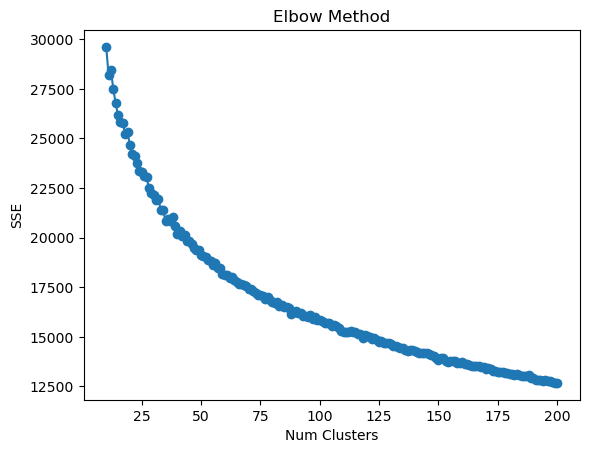

In [61]:
sse = []
for k in range(10, 201):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genre_artist_matrix)
    sse.append(kmeans.inertia_)

plt.plot(range(10,201), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('SSE')
plt.show()

In [62]:
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(genre_artist_matrix)
artists_with_genre['cluster'] = labels

C:\Users\ishan\AppData\Local\Temp\ipykernel_8760\725513532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_with_genre['cluster'] = labels


In [63]:
for i in range(k):
    cluster_genres = artists_with_genre[artists_with_genre['cluster'] == i]['artist_genres'].explode().value_counts().head(10)
    print(f"Most common genres in cluster {i}:\n{cluster_genres}\n")

Most common genres in cluster 0:
artist_genres
modern bollywood         103
filmi                     82
desi pop                  23
classic bollywood         10
sufi                       5
hare krishna               3
gujarati pop               2
indian instrumental        2
classic pakistani pop      2
afghan pop                 2
Name: count, dtype: int64

Most common genres in cluster 1:
artist_genres
classical performance                109
classical piano                       67
orchestral performance                43
french classical piano                25
indian classical                      20
hindustani classical                  20
classical                             17
russian classical piano               16
historically informed performance     13
german classical piano                12
Name: count, dtype: int64

Most common genres in cluster 2:
artist_genres
classic rock      24
album rock        23
rock              21
mellow gold       18
hard rock         17
